### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np

plt.style.use('seaborn-darkgrid')

### Read Data

In [2]:
df=pd.read_csv('schedule.csv')
df

,Task,start,end,Department,Completion
0,Task A,14-Jun-2021,18-Jun-2021,Mkt,100
1,Task B,16-Jun-2021,24-Jun-2021,Fin,100
2,Task C,18-Jun-2021,22-Jun-2021,Fin,100
3,Task D,22-Jun-2021,25-Jun-2021,Mkt,90
4,Task E,22-Jun-2021,30-Jun-2021,HR,60
5,Task F,24-Jun-2021,26-Jun-2021,Fin,50
6,Task G,25-Jun-2021,26-Jun-2021,Fin,20
7,Task H,27-Jun-2021,30-Jun-2021,Mkt,20
8,Task I,27-Jun-2021,03-Jul-2021,Mkt,10
9,Task J,30-Jun-2021,04-Jul-2021,Mkt,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
Task          12 non-null object
start         12 non-null object
end           12 non-null object
Department    12 non-null object
Completion    12 non-null int64
dtypes: int64(1), object(4)
memory usage: 560.0+ bytes


In [4]:
df.start=df.start.apply(lambda x: x+str('-2021'))
df.end=df.end.apply(lambda x: x+str('-2021'))
df

,Task,start,end,Department,Completion
0,Task A,14-Jun-2021-2021,18-Jun-2021-2021,Mkt,100
1,Task B,16-Jun-2021-2021,24-Jun-2021-2021,Fin,100
2,Task C,18-Jun-2021-2021,22-Jun-2021-2021,Fin,100
3,Task D,22-Jun-2021-2021,25-Jun-2021-2021,Mkt,90
4,Task E,22-Jun-2021-2021,30-Jun-2021-2021,HR,60
5,Task F,24-Jun-2021-2021,26-Jun-2021-2021,Fin,50
6,Task G,25-Jun-2021-2021,26-Jun-2021-2021,Fin,20
7,Task H,27-Jun-2021-2021,30-Jun-2021-2021,Mkt,20
8,Task I,27-Jun-2021-2021,03-Jul-2021-2021,Mkt,10
9,Task J,30-Jun-2021-2021,04-Jul-2021-2021,Mkt,0


In [5]:
df.start=pd.to_datetime(df.start)
df.end=pd.to_datetime(df.end)
df

,Task,start,end,Department,Completion
0,Task A,2021-06-14 20:21:00,2021-06-18 20:21:00,Mkt,100
1,Task B,2021-06-16 20:21:00,2021-06-24 20:21:00,Fin,100
2,Task C,2021-06-18 20:21:00,2021-06-22 20:21:00,Fin,100
3,Task D,2021-06-22 20:21:00,2021-06-25 20:21:00,Mkt,90
4,Task E,2021-06-22 20:21:00,2021-06-30 20:21:00,HR,60
5,Task F,2021-06-24 20:21:00,2021-06-26 20:21:00,Fin,50
6,Task G,2021-06-25 20:21:00,2021-06-26 20:21:00,Fin,20
7,Task H,2021-06-27 20:21:00,2021-06-30 20:21:00,Mkt,20
8,Task I,2021-06-27 20:21:00,2021-07-03 20:21:00,Mkt,10
9,Task J,2021-06-30 20:21:00,2021-07-04 20:21:00,Mkt,0


In [6]:
df['Duration']=df.end-df.start
df

,Task,start,end,Department,Completion,Duration
0,Task A,2021-06-14 20:21:00,2021-06-18 20:21:00,Mkt,100,4 days
1,Task B,2021-06-16 20:21:00,2021-06-24 20:21:00,Fin,100,8 days
2,Task C,2021-06-18 20:21:00,2021-06-22 20:21:00,Fin,100,4 days
3,Task D,2021-06-22 20:21:00,2021-06-25 20:21:00,Mkt,90,3 days
4,Task E,2021-06-22 20:21:00,2021-06-30 20:21:00,HR,60,8 days
5,Task F,2021-06-24 20:21:00,2021-06-26 20:21:00,Fin,50,2 days
6,Task G,2021-06-25 20:21:00,2021-06-26 20:21:00,Fin,20,1 days
7,Task H,2021-06-27 20:21:00,2021-06-30 20:21:00,Mkt,20,3 days
8,Task I,2021-06-27 20:21:00,2021-07-03 20:21:00,Mkt,10,6 days
9,Task J,2021-06-30 20:21:00,2021-07-04 20:21:00,Mkt,0,4 days


In [7]:
df.Duration=df.Duration.apply(lambda x: x.days+1)
df

,Task,start,end,Department,Completion,Duration
0,Task A,2021-06-14 20:21:00,2021-06-18 20:21:00,Mkt,100,5
1,Task B,2021-06-16 20:21:00,2021-06-24 20:21:00,Fin,100,9
2,Task C,2021-06-18 20:21:00,2021-06-22 20:21:00,Fin,100,5
3,Task D,2021-06-22 20:21:00,2021-06-25 20:21:00,Mkt,90,4
4,Task E,2021-06-22 20:21:00,2021-06-30 20:21:00,HR,60,9
5,Task F,2021-06-24 20:21:00,2021-06-26 20:21:00,Fin,50,3
6,Task G,2021-06-25 20:21:00,2021-06-26 20:21:00,Fin,20,2
7,Task H,2021-06-27 20:21:00,2021-06-30 20:21:00,Mkt,20,4
8,Task I,2021-06-27 20:21:00,2021-07-03 20:21:00,Mkt,10,7
9,Task J,2021-06-30 20:21:00,2021-07-04 20:21:00,Mkt,0,5


In [8]:
project_start_date=df.start.min()
project_end_date=df.end.max()
project_duration=(project_end_date-project_start_date).days+1

print('Project start date :', project_start_date)
print('Project end date :', project_end_date)
print('Project duration :', project_duration)

Project start date : 2021-06-14 20:21:00
Project end date : 2021-07-08 20:21:00
Project duration : 25


In [9]:
df['rel_start']=df.start-project_start_date
df.rel_start=df.rel_start.apply(lambda x:x.days)
df

,Task,start,end,Department,Completion,Duration,rel_start
0,Task A,2021-06-14 20:21:00,2021-06-18 20:21:00,Mkt,100,5,0
1,Task B,2021-06-16 20:21:00,2021-06-24 20:21:00,Fin,100,9,2
2,Task C,2021-06-18 20:21:00,2021-06-22 20:21:00,Fin,100,5,4
3,Task D,2021-06-22 20:21:00,2021-06-25 20:21:00,Mkt,90,4,8
4,Task E,2021-06-22 20:21:00,2021-06-30 20:21:00,HR,60,9,8
5,Task F,2021-06-24 20:21:00,2021-06-26 20:21:00,Fin,50,3,10
6,Task G,2021-06-25 20:21:00,2021-06-26 20:21:00,Fin,20,2,11
7,Task H,2021-06-27 20:21:00,2021-06-30 20:21:00,Mkt,20,4,13
8,Task I,2021-06-27 20:21:00,2021-07-03 20:21:00,Mkt,10,7,13
9,Task J,2021-06-30 20:21:00,2021-07-04 20:21:00,Mkt,0,5,16


In [10]:
xlabels=[(project_start_date+timedelta(days=x)).strftime("%Y-%b-%d") for x in range(project_duration+1)]

In [11]:
xticks=[i for i in range(project_duration+1)]

In [12]:
frequency=len(xticks)//5

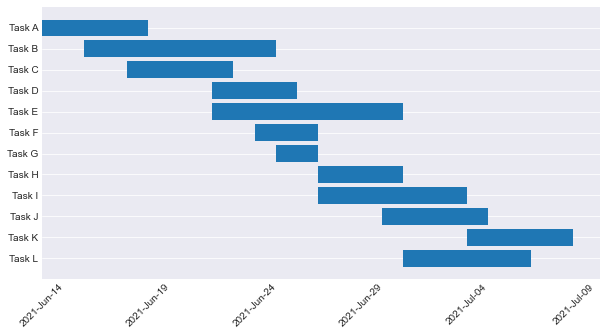

In [13]:
plt.figure(figsize=(10,5))
plt.barh(df.Task, left=df.rel_start, width=df.Duration)
plt.gca().invert_yaxis()

plt.xticks(ticks=xticks[::frequency],labels=xlabels[::frequency], rotation=45)
plt.grid(which='both', axis='x')
plt.show()

In [14]:
yticks=[x for x in range(len(df.Task))]

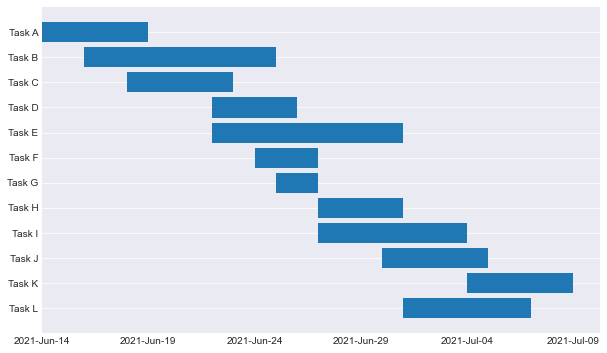

In [15]:
plt.figure(figsize=(10,6))

plt.barh(yticks, left=df.rel_start, width=df.Duration)

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])
plt.grid(axis='x')
plt.show()

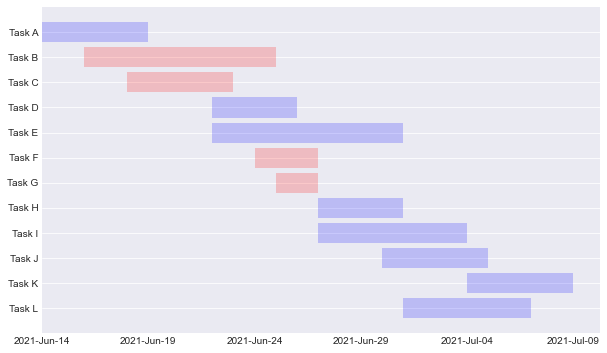

In [16]:
plt.figure(figsize=(10,6))

for i in yticks:
    if df.Department[i]=='Fin':
        col='red'
    else:
        col='blue'
    plt.barh(yticks[i], left=df.rel_start[i], width=df.Duration[i], color=col, alpha=0.2)

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])
plt.grid(axis='x')
plt.show()

In [17]:
df['comp']=round(df.Completion*df.Duration/100,2)
df

,Task,start,end,Department,Completion,Duration,rel_start,comp
0,Task A,2021-06-14 20:21:00,2021-06-18 20:21:00,Mkt,100,5,0,5.0
1,Task B,2021-06-16 20:21:00,2021-06-24 20:21:00,Fin,100,9,2,9.0
2,Task C,2021-06-18 20:21:00,2021-06-22 20:21:00,Fin,100,5,4,5.0
3,Task D,2021-06-22 20:21:00,2021-06-25 20:21:00,Mkt,90,4,8,3.6
4,Task E,2021-06-22 20:21:00,2021-06-30 20:21:00,HR,60,9,8,5.4
5,Task F,2021-06-24 20:21:00,2021-06-26 20:21:00,Fin,50,3,10,1.5
6,Task G,2021-06-25 20:21:00,2021-06-26 20:21:00,Fin,20,2,11,0.4
7,Task H,2021-06-27 20:21:00,2021-06-30 20:21:00,Mkt,20,4,13,0.8
8,Task I,2021-06-27 20:21:00,2021-07-03 20:21:00,Mkt,10,7,13,0.7
9,Task J,2021-06-30 20:21:00,2021-07-04 20:21:00,Mkt,0,5,16,0.0


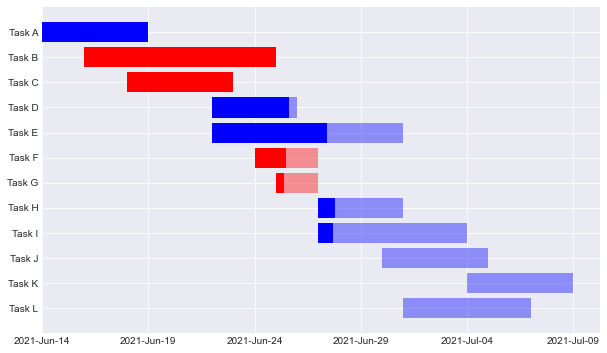

In [18]:
plt.figure(figsize=(10,6))

for i in yticks:
    if df.Department[i]=='Fin':
        col='red'
    else:
        col='blue'
    plt.barh(yticks[i], left=df.rel_start[i], width=df.Duration[i], color=col, alpha=0.4)
    plt.barh(yticks[i], left=df.rel_start[i], width=df.comp[i], color=col, alpha=1)

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])
plt.show()

In [19]:
color_dict={'HR':'red', 'Mkt':'blue', 'Fin':'green', 'RnD':'aqua'}

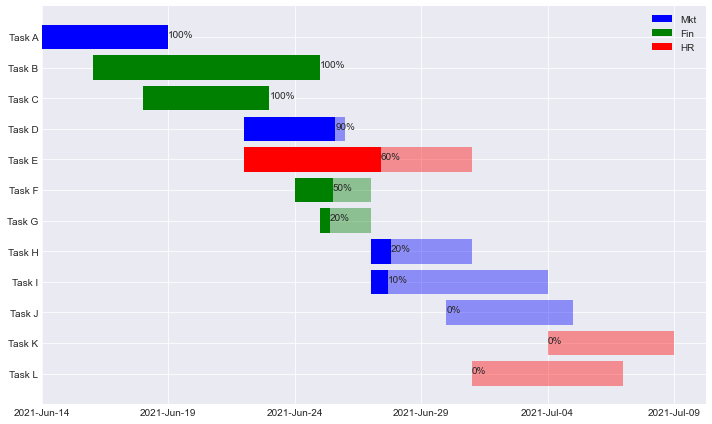

In [20]:
plt.figure(figsize=(10,6))

for i in yticks:
    plt.barh(yticks[i], left=df.rel_start[i], width=df.Duration[i], 
             color=color_dict[df.Department[i]], alpha=0.4)
    plt.barh(yticks[i], left=df.rel_start[i], width=df.comp[i],  
             color=color_dict[df.Department[i]], alpha=1, label=df.Department[i])
    plt.text(x=df.rel_start[i]+df.comp[i], y=yticks[i], s=str(df.Completion[i])+"%")

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])

#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)
plt.tight_layout()

plt.show()

In [21]:
df=df.sort_values(by=['Department', 'Task'], ascending=True).reset_index()

In [22]:
yticks=[i for i in range(df.shape[0])]

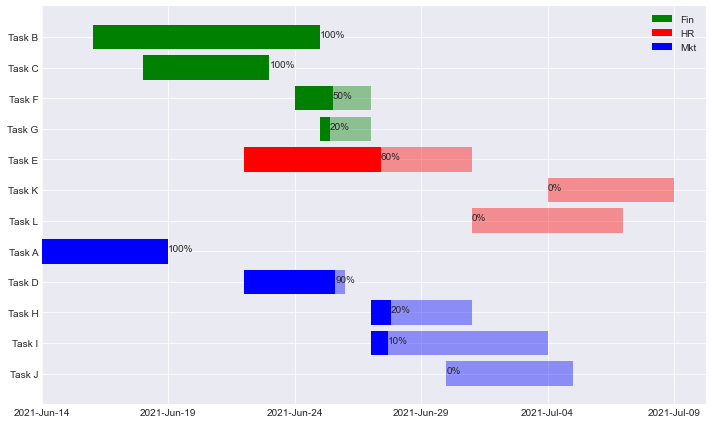

In [23]:
plt.figure(figsize=(10,6))

for i in yticks:
    plt.barh(yticks[i], left=df.rel_start[i], width=df.Duration[i], 
             color=color_dict[df.Department[i]], alpha=0.4)
    plt.barh(yticks[i], left=df.rel_start[i], width=df.comp[i],  
             color=color_dict[df.Department[i]], alpha=1, label=df.Department[i])
    plt.text(x=df.rel_start[i]+df.comp[i], y=yticks[i], s=str(df.Completion[i])+"%")

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])

#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)
plt.tight_layout()

plt.show()

In [24]:
df=df.sort_values(by=['start', 'Department'], ascending=True).reset_index()

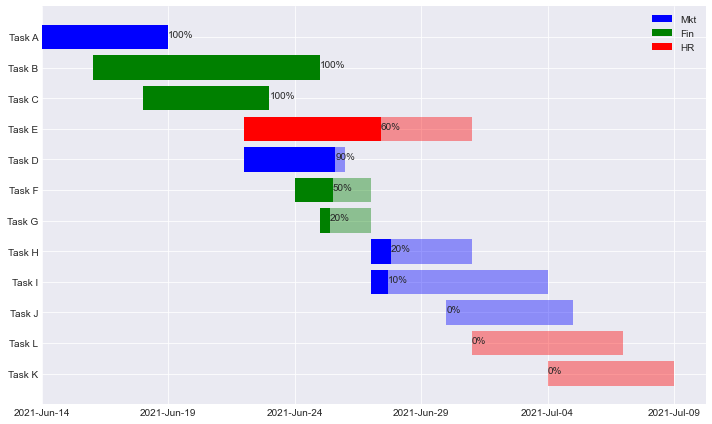

In [25]:
plt.figure(figsize=(10,6))

for i in yticks:
    plt.barh(yticks[i], left=df.rel_start[i], width=df.Duration[i], 
             color=color_dict[df.Department[i]], alpha=0.4)
    plt.barh(yticks[i], left=df.rel_start[i], width=df.comp[i],  
             color=color_dict[df.Department[i]], alpha=1, label=df.Department[i])
    plt.text(x=df.rel_start[i]+df.comp[i], y=yticks[i], s=str(df.Completion[i])+"%")

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xticks(xticks[::5], xlabels[::5])

#fix legends
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)
plt.tight_layout()

plt.show()

In [142]:
df=pd.read_csv('sch_day.csv')
df

,Task,Day,start,end
0,Task A,12-09-2021,09:00,09:10
1,Task B,12-09-2021,10:30,12:30
2,Task C,12-09-2021,13:15,15:30
3,Task E,12-09-2021,16:45,17:00
4,SoD,12-09-2021,09:00,NaN
5,EoD,12-09-2021,17:00,NaN


In [85]:
# Get SoD and EOD
SoD=df[df.Task=='SoD'].Day.values[0]+' '+df[df.Task=='SoD'].start.values[0]
SoD=pd.to_datetime(SoD)
EoD=df[df.Task=='EoD'].Day.values[0]+' '+df[df.Task=='EoD'].start.values[0]
EoD=pd.to_datetime(EoD)
print('SoD :', SoD)
print('EoD :', EoD)

SoD : 2021-12-09 09:00:00
EoD : 2021-12-09 17:00:00


In [94]:
day_duration=EoD-SoD
#day duration in minutes
day_duration=int(day_duration.seconds/60)
day_duration

480

In [95]:
df=df[df.end.isna()==False]
df

,Task,Day,start,end
0,Task A,12-09-2021,09:00,09:10
1,Task B,12-09-2021,10:30,12:30
2,Task C,12-09-2021,13:15,15:30
3,Task E,12-09-2021,16:45,17:00


In [96]:
df.start=df.Day+' '+df.start
df.start=pd.to_datetime(df.start)
df.end=df.Day+' '+df.end
df.end=pd.to_datetime(df.end)
df

,Task,Day,start,end
0,Task A,12-09-2021,2021-12-09 09:00:00,2021-12-09 09:10:00
1,Task B,12-09-2021,2021-12-09 10:30:00,2021-12-09 12:30:00
2,Task C,12-09-2021,2021-12-09 13:15:00,2021-12-09 15:30:00
3,Task E,12-09-2021,2021-12-09 16:45:00,2021-12-09 17:00:00


In [100]:
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x:int(x.seconds/60))
df

,Task,Day,start,end,duration
0,Task A,12-09-2021,2021-12-09 09:00:00,2021-12-09 09:10:00,10
1,Task B,12-09-2021,2021-12-09 10:30:00,2021-12-09 12:30:00,120
2,Task C,12-09-2021,2021-12-09 13:15:00,2021-12-09 15:30:00,135
3,Task E,12-09-2021,2021-12-09 16:45:00,2021-12-09 17:00:00,15


In [103]:
df['rel_start']=df.start.apply(lambda x:x-SoD)
df.rel_start=df.rel_start.apply(lambda x:int(x.seconds/60))
df

,Task,Day,start,end,duration,rel_start
0,Task A,12-09-2021,2021-12-09 09:00:00,2021-12-09 09:10:00,10,0
1,Task B,12-09-2021,2021-12-09 10:30:00,2021-12-09 12:30:00,120,90
2,Task C,12-09-2021,2021-12-09 13:15:00,2021-12-09 15:30:00,135,255
3,Task E,12-09-2021,2021-12-09 16:45:00,2021-12-09 17:00:00,15,465


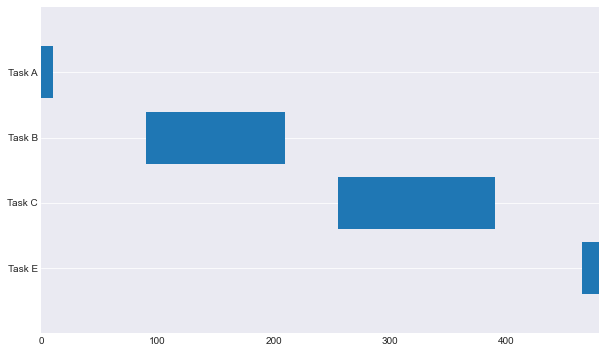

In [107]:
yticks=[x for x in range(len(df.Task))]

plt.figure(figsize=(10,6))

plt.barh(yticks, left=df.rel_start, width=df.duration)

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xlim(0,day_duration)
#plt.xticks(xticks[::5], xlabels[::5])
plt.grid(axis='x')
plt.show()

In [123]:
def hour_formatter(n):
    if n>12:
        a=n-12
    else:
        a=n
    if n>11:
        return f'{a:02} pm'
    else:
        return f'{a:02} am'

In [128]:
hour_formatter(13)

'01 pm'

In [129]:
x_ticks={}
a=9
for i in range(int(day_duration/60)+1):
    t=hour_formatter(a+i)
    x_ticks.update({i*60:t})
x_ticks

{0: '09 am',
 60: '10 am',
 120: '11 am',
 180: '12 pm',
 240: '01 pm',
 300: '02 pm',
 360: '03 pm',
 420: '04 pm',
 480: '05 pm'}

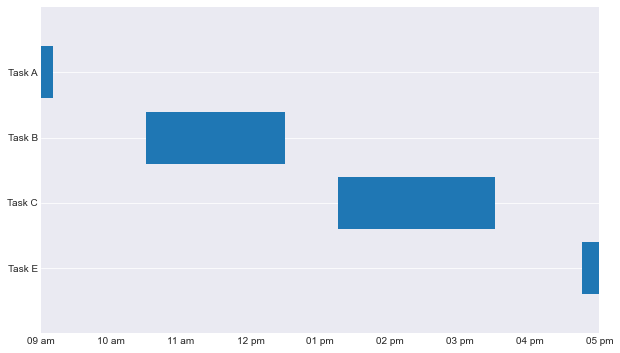

In [141]:
yticks=[x for x in range(len(df.Task))]

plt.figure(figsize=(10,6))

plt.barh(yticks, left=df.rel_start, width=df.duration)

plt.ylim(max(yticks)+1, min(yticks)-1)
plt.yticks(yticks, df.Task)

plt.xlim(0,day_duration)
plt.xticks(list(x_ticks.keys()), labels=list(x_ticks.values()))
plt.xticks()
plt.grid(axis='x')
plt.show()